# Тема “Обучение без учителя”

## Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
from sklearn.datasets import load_boston

In [38]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [39]:
X = pd.DataFrame(boston.data, columns = boston.feature_names)
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [40]:
y = pd.DataFrame(boston.target, columns = ["price"])
y

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler = StandardScaler()

In [45]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [46]:
from sklearn.manifold import TSNE

In [47]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [48]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


In [49]:
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

In [55]:
plt.style.use('fivethirtyeight')

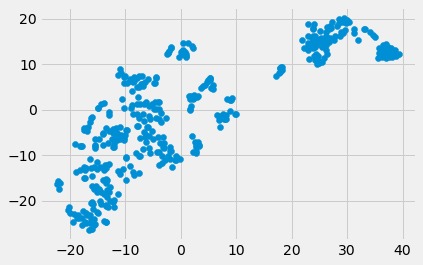

In [57]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

## Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random staterandom_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.

In [58]:
from sklearn.cluster import KMeans

In [61]:
model = KMeans(X_train, n_clusters = 3, max_iter = 100, random_state = 42)

In [62]:
model

KMeans(max_iter=100,
       n_clusters=         CRIM    ZN  INDUS  CHAS     NOX     RM   AGE     DIS   RAD    TAX  \
477  15.02340   0.0  18.10   0.0  0.6140  5.304  97.3  2.1007  24.0  666.0   
15    0.62739   0.0   8.14   0.0  0.5380  5.834  56.5  4.4986   4.0  307.0   
332   0.03466  35.0   6.06   0.0  0.4379  6.031  23.3  6.6407   1.0  304.0   
423   7.05042   0.0  18.10   0.0  0.6140  6.103  85.1  2.0218  24.0  666.0   
19    0.72580   0.0   8.14   0.0  0.5380  5.727  69.5  3.7965   4.0  307.0   
..        ...   ...    ...   ...     ...    ...   ...     ...   ...    ...   
106   0....
348   0.01501  80.0   2.01   0.0  0.4350  6.635  29.7  8.3440   4.0  280.0   
435  11.16040   0.0  18.10   0.0  0.7400  6.629  94.6  2.1247  24.0  666.0   
102   0.22876   0.0   8.56   0.0  0.5200  6.405  85.4  2.7147   5.0  384.0   

     PTRATIO       B  LSTAT  
477     20.2  349.48  24.91  
15      21.0  395.62   8.47  
332     16.9  362.25   7.83  
423     20.2    2.52  23.29  
19      21.0  390.

In [74]:
labels_train = model.fit_predict(X_train_scaled)

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

TypeError: float() argument must be a string or a number, not 'KMeans'

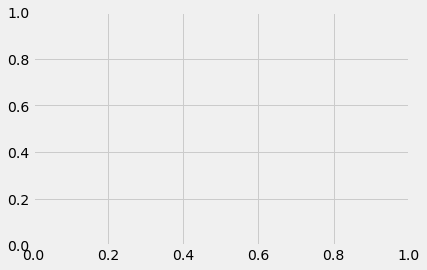

In [73]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=model)

plt.show()

In [76]:
X_train[labels_train == 0].mean('price')

NameError: name 'labels_train' is not defined

In [75]:
X_train[labels_train == 1].mean('price')

NameError: name 'labels_train' is not defined

In [77]:
X_train[labels_train == 2].mean('CRIM')

NameError: name 'labels_train' is not defined

## *Задание 3
Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [78]:
model_test = KMeans(X_test, n_clusters = 3, max_iter = 100, random_state = 42)

In [79]:
model_test

KMeans(max_iter=100,
       n_clusters=         CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
173   0.09178   0.0   4.05   0.0  0.510  6.416   84.1  2.6463   5.0  296.0   
274   0.05644  40.0   6.41   1.0  0.447  6.758   32.9  4.0776   4.0  254.0   
491   0.10574   0.0  27.74   0.0  0.609  5.983   98.8  1.8681   4.0  711.0   
72    0.09164   0.0  10.81   0.0  0.413  6.065    7.8  5.2873   4.0  305.0   
452   5.09017   0.0  18.10   0.0  0.713  6.297   91.8  2.3682  24.0  666.0   
..        ...   ...    ...   ...    ...    ...    ...     ...   ...    ...   
412  18.81100...
411  14.05070   0.0  18.10   0.0  0.597  6.657  100.0  1.5275  24.0  666.0   
86    0.05188   0.0   4.49   0.0  0.449  6.015   45.1  4.4272   3.0  247.0   
75    0.09512   0.0  12.83   0.0  0.437  6.286   45.0  4.5026   5.0  398.0   

     PTRATIO       B  LSTAT  
173     16.6  395.50   9.04  
274     17.6  396.90   3.53  
491     20.1  390.11  18.07  
72      19.2  390.91   5.52  
452     20.2 

In [81]:
labels_test = model.fit_predict(X_test_scaled)

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [80]:
X_test[labels_test == 2].mean('CRIM')

NameError: name 'labels_train' is not defined

In [ ]:
X_test[labels_test == 3].mean('price')